In [13]:
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torchok.data.transforms import (
    Compose,
    PadIfNeeded,
    Crop,
    Normalize,
    ToTensorV2,
)

from russian_htr import HandwrittenDataset, GroupSampler

In [49]:
BATCH_SIZE = 16

# datasets params
DS = "IAM"  # "IAM" or "CVL"
HEIGHT = 32
WIDTH = 192
DS_PATH = f"/home/d.nesterov/russian-htr/data/{DS}-32.pickle"

In [52]:
# Handwritten Dataset creation example

transform = Compose([
	PadIfNeeded(min_height=HEIGHT, min_width=WIDTH, border_mode=0, value=0),
	Crop(y_max=HEIGHT, x_max=WIDTH),
	Normalize(),
	ToTensorV2()
])

ds_train = HandwrittenDataset(DS_PATH, mode='train', transform=transform)

In [54]:
# GroupSampler usage example

sampler = GroupSampler(ds_train, BATCH_SIZE, drop_last=True)
dl = DataLoader(ds_train, batch_sampler=sampler)

total = 0
for i, batch in enumerate(dl):
	total += len(batch['image'])
print(f"Total images: {total}, ds len: {len(ds_train)}, n_batches: {i}")

Total images: 63760, ds len: 66603, n_batches: 3984


In [55]:
MEAN = np.array([0.485, 0.456, 0.406])
STD = np.array([0.229, 0.224, 0.225])

def imshow(img, title=None, plt_ax=plt, default=False):
    img = img.numpy().transpose((1, 2, 0))
    img = STD * img + MEAN
    img = np.clip(img, 0, 1)
    plt_ax.imshow(img)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

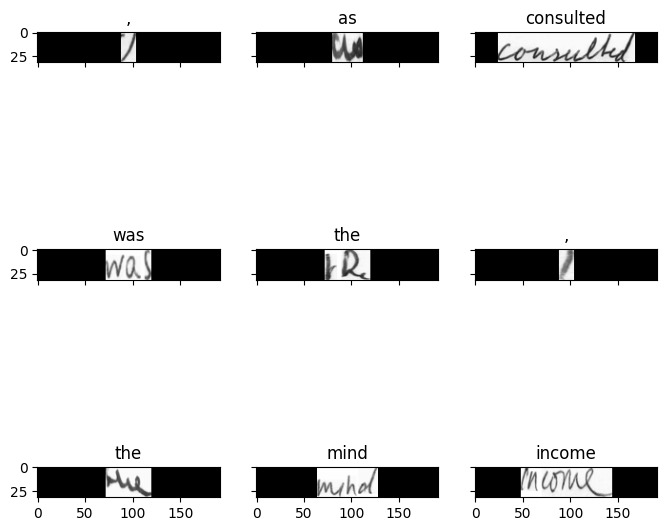

In [61]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 8), sharey=True, sharex=True)
for fig_x in ax.flatten():
    idx = np.random.randint(len(ds_train))
    sample = ds_train[idx]
    imshow(sample['image'], title=sample['target'], plt_ax=fig_x)
plt.show()